<a href="https://colab.research.google.com/github/muhammadarya11/AnemiCare/blob/ML/Capstone_Anemia_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Capstone Project

**Title:** Anemia Prediction Based on Blood Lab Results  
**Dataset:** [Kaggle - Anemia Types Classification](https://www.kaggle.com/datasets/ehababoelnaga/anemia-types-classification)  
**Team ID:** C242-PS485

**Team Members:**
1. Kiki Aimar Wicaksana, ML (M335B4KY2216) – Universitas Yarsi
2. Muhammad Ramadhan Prinada, ML (M335B4KY3203) – Universitas Yarsi
3. Arina Pramudita, ML (M194B4KX0694) – Universitas Budi Luhur
4. Karin Novrika, CC (C128B4KX2140) – Politeknik Negeri Jakarta
5. Muhammad Arya Kusuma, CC (C335B4KY2748) – Universitas Yarsi
6. I Komang Abimanyu, MD (A335B4KY1840) – Universitas Yarsi

**Overview:**

Anemia, a common condition, can lead to serious complications if not diagnosed promptly. Traditional diagnosis is often time-consuming, potentially delaying treatment. This project aims to assist healthcare providers in quickly classifying anemia types through machine learning. Using Complete Blood Count (CBC) test data, our application predicts anemia types, including 'Normocytic hypochromic anemia,' 'Iron deficiency anemia,' 'Other microcytic anemia,' 'Leukemia,' 'Thrombocytopenia,' and 'Macrocytic anemia.'



## Import Library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
from tensorflow.keras.regularizers import l2

## Load Dataset

In [ ]:
from google.colab import drive

drive.mount('/content/drive')
path = '/content/drive/MyDrive/diagnosed_cbc_data_v4.csv'

Mounted at /content/drive


In [ ]:
# from google.colab import files

# # Mengunggah file
# path = files.upload()

Saving diagnosed_cbc_data_v4.csv to diagnosed_cbc_data_v4 (2).csv


In [ ]:
# df = pd.read_csv('diagnosed_cbc_data_v4.csv')
df = pd.read_csv(path)
df.head(10)

,WBC,LYMp,NEUTp,LYMn,NEUTn,RBC,HGB,HCT,MCV,MCH,MCHC,PLT,PDW,PCT,Diagnosis
0,10.0,43.2,50.1,4.3,5.0,2.77,7.3,24.2,87.7,26.3,30.1,189.0,12.5,0.17,Normocytic hypochromic anemia
1,10.0,42.4,52.3,4.2,5.3,2.84,7.3,25.0,88.2,25.7,20.2,180.0,12.5,0.16,Normocytic hypochromic anemia
2,7.2,30.7,60.7,2.2,4.4,3.97,9.0,30.5,77.0,22.6,29.5,148.0,14.3,0.14,Iron deficiency anemia
3,6.0,30.2,63.5,1.8,3.8,4.22,3.8,32.8,77.9,23.2,29.8,143.0,11.3,0.12,Iron deficiency anemia
4,4.2,39.1,53.7,1.6,2.3,3.93,0.4,316.0,80.6,23.9,29.7,236.0,12.8,0.22,Normocytic hypochromic anemia
5,6.6,27.3,65.4,1.8,4.3,3.96,8.8,29.7,75.2,22.2,79.6,207.0,11.5,0.18,Other microcytic anemia
6,16.7,19.1,68.2,3.2,11.4,5.15,14.2,44.8,87.1,27.5,31.6,151.0,12.8,0.14,Leukemia
7,9.3,27.4,64.0,2.6,5.9,4.39,12.0,37.9,86.4,27.3,31.6,194.0,15.9,0.19,Normocytic hypochromic anemia
8,5.2,19.7,72.4,1.0,3.8,4.85,13.2,41.0,84.7,27.2,32.1,181.0,10.0,0.15,Healthy
9,10.5,12.4,79.0,1.3,8.3,4.57,12.4,38.9,85.3,27.1,31.8,164.0,11.3,0.14,Normocytic hypochromic anemia


## Data Exploration

In [ ]:
print(df.shape)
df.info()

(1281, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1281 entries, 0 to 1280
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   WBC        1281 non-null   float64
 1   LYMp       1281 non-null   float64
 2   NEUTp      1281 non-null   float64
 3   LYMn       1281 non-null   float64
 4   NEUTn      1281 non-null   float64
 5   RBC        1281 non-null   float64
 6   HGB        1281 non-null   float64
 7   HCT        1281 non-null   float64
 8   MCV        1281 non-null   float64
 9   MCH        1281 non-null   float64
 10  MCHC       1281 non-null   float64
 11  PLT        1281 non-null   float64
 12  PDW        1281 non-null   float64
 13  PCT        1281 non-null   float64
 14  Diagnosis  1281 non-null   object 
dtypes: float64(14), object(1)
memory usage: 150.2+ KB


In [ ]:
df.describe()

,WBC,LYMp,NEUTp,LYMn,NEUTn,RBC,HGB,HCT,MCV,MCH,MCHC,PLT,PDW,PCT
count,1281.000000,1281.000000,1281.000000,1281.000000,1281.000000,1281.000000,1281.000000,1281.0000,1281.000000,1281.000000,1281.000000,1281.000000,1281.000000,1281.000000
mean,7.862717,25.845000,77.511000,1.880760,5.140940,4.708267,12.184551,46.1526,85.793919,32.084840,31.739149,229.981421,14.312512,0.260280
std,3.564466,7.038728,147.746273,1.335689,2.872294,2.817200,3.812897,104.8861,27.177663,111.170756,3.300352,93.019336,3.005079,0.685351
min,0.800000,6.200000,0.700000,0.200000,0.500000,1.360000,-10.000000,2.0000,-79.300000,10.900000,11.500000,10.000000,8.400000,0.010000
25%,6.000000,25.845000,71.100000,1.880760,5.100000,4.190000,10.800000,39.2000,81.200000,25.500000,30.600000,157.000000,13.300000,0.170000
50%,7.400000,25.845000,77.511000,1.880760,5.140940,4.600000,12.300000,46.1526,86.600000,27.800000,32.000000,213.000000,14.312512,0.260280
75%,8.680000,25.845000,77.511000,1.880760,5.140940,5.100000,13.500000,46.1526,90.200000,29.600000,32.900000,293.000000,14.700000,0.260280
max,45.700000,91.400000,5317.000000,41.800000,79.000000,90.800000,87.100000,3715.0000,990.000000,3117.000000,92.800000,660.000000,97.000000,13.600000


In [ ]:
# missing value

df.isna().sum()

,0
WBC,0
LYMp,0
NEUTp,0
LYMn,0
NEUTn,0
RBC,0
HGB,0
HCT,0
MCV,0
MCH,0


In [ ]:
# data duplicate

print("Jumlah duplikasi pada data: ", df.duplicated().sum())

# drop duplilcate data

df.drop_duplicates(inplace=True)
print("Jumlah duplikasi pada data: ", df.duplicated().sum())

Jumlah duplikasi pada data:  49
Jumlah duplikasi pada data:  0


In [ ]:
# feature description
column_descriptions = {
    "WBC": ["White Blood Cell count", "jumlah sel darah putih dalam darah"],
    "LYMp": ["Lymphocyte percentage", "sel darah putih yang membantu melawan infeksi"],
    "NEUTp": ["Neutrophil percentage", "sel darah putih yang penting dalam melawan bakteri"],
    "LYMn": ["Lymphocyte number", "jumlah absolut limfosit dalam darah"],
    "NEUTn": ["Neutrophil number", "jumlah absolut neutrofil dalam darah"],
    "RBC": ["Red Blood Cell count", "jumlah sel darah merah"],
    "HGB": ["Hemoglobin level", "protein dalam sel darah merah yang membawa oksigen"],
    "HCT": ["Hematocrit", "persentase volume darah yang terdiri dari sel darah merah"],
    "MCV": ["Mean Corpuscular Volume", "rata-rata volume sel darah merah, membantu dalam mendiagnosis jenis anemia"],
    "MCH": ["Mean Corpuscular Hemoglobin", "rata-rata jumlah hemoglobin per sel darah merah"],
    "MCHC": ["Mean Corpuscular Hemoglobin Concentration", "rata-rata konsentrasi hemoglobin dalam volume sel darah merah"],
    "PLT": ["Platelet count", "jumlah trombosit, yang berperan dalam proses pembekuan darah"],
    "PDW": ["Platelet Distribution Width", "ukuran distribusi ukuran trombosit dalam darah"],
    "PCT": ["Plateletcrit", "persentase volume darah yang terdiri dari trombosit"],
    "Diagnosis": ["Output/Label", "tipe anemia"]
}

# using table
df_descriptions = pd.DataFrame.from_dict(column_descriptions, orient="index", columns=["Description", "Additional Description"])
df_descriptions.reset_index(inplace=True)
df_descriptions.rename(columns={"index": "Column"}, inplace=True)

# merapihkan table
def left_align(s):
    return ['text-align: left' for _ in s]

styled_df = df_descriptions.style.apply(left_align, axis=1).set_table_styles(
    [{'selector': 'th', 'props': [('text-align', 'left')]}]
)

styled_df

,Column,Description,Additional Description
0,WBC,White Blood Cell count,jumlah sel darah putih dalam darah
1,LYMp,Lymphocyte percentage,sel darah putih yang membantu melawan infeksi
2,NEUTp,Neutrophil percentage,sel darah putih yang penting dalam melawan bakteri
3,LYMn,Lymphocyte number,jumlah absolut limfosit dalam darah
4,NEUTn,Neutrophil number,jumlah absolut neutrofil dalam darah
5,RBC,Red Blood Cell count,jumlah sel darah merah
6,HGB,Hemoglobin level,protein dalam sel darah merah yang membawa oksigen
7,HCT,Hematocrit,persentase volume darah yang terdiri dari sel darah merah
8,MCV,Mean Corpuscular Volume,"rata-rata volume sel darah merah, membantu dalam mendiagnosis jenis anemia"
9,MCH,Mean Corpuscular Hemoglobin,rata-rata jumlah hemoglobin per sel darah merah


In [ ]:
# label

label = df['Diagnosis'].unique()
print(label)
print(label.dtype)

['Normocytic hypochromic anemia' 'Iron deficiency anemia'
 'Other microcytic anemia' 'Leukemia' 'Healthy' 'Thrombocytopenia'
 'Normocytic normochromic anemia' 'Leukemia with thrombocytopenia'
 'Macrocytic anemia']
object


## Data Visualization

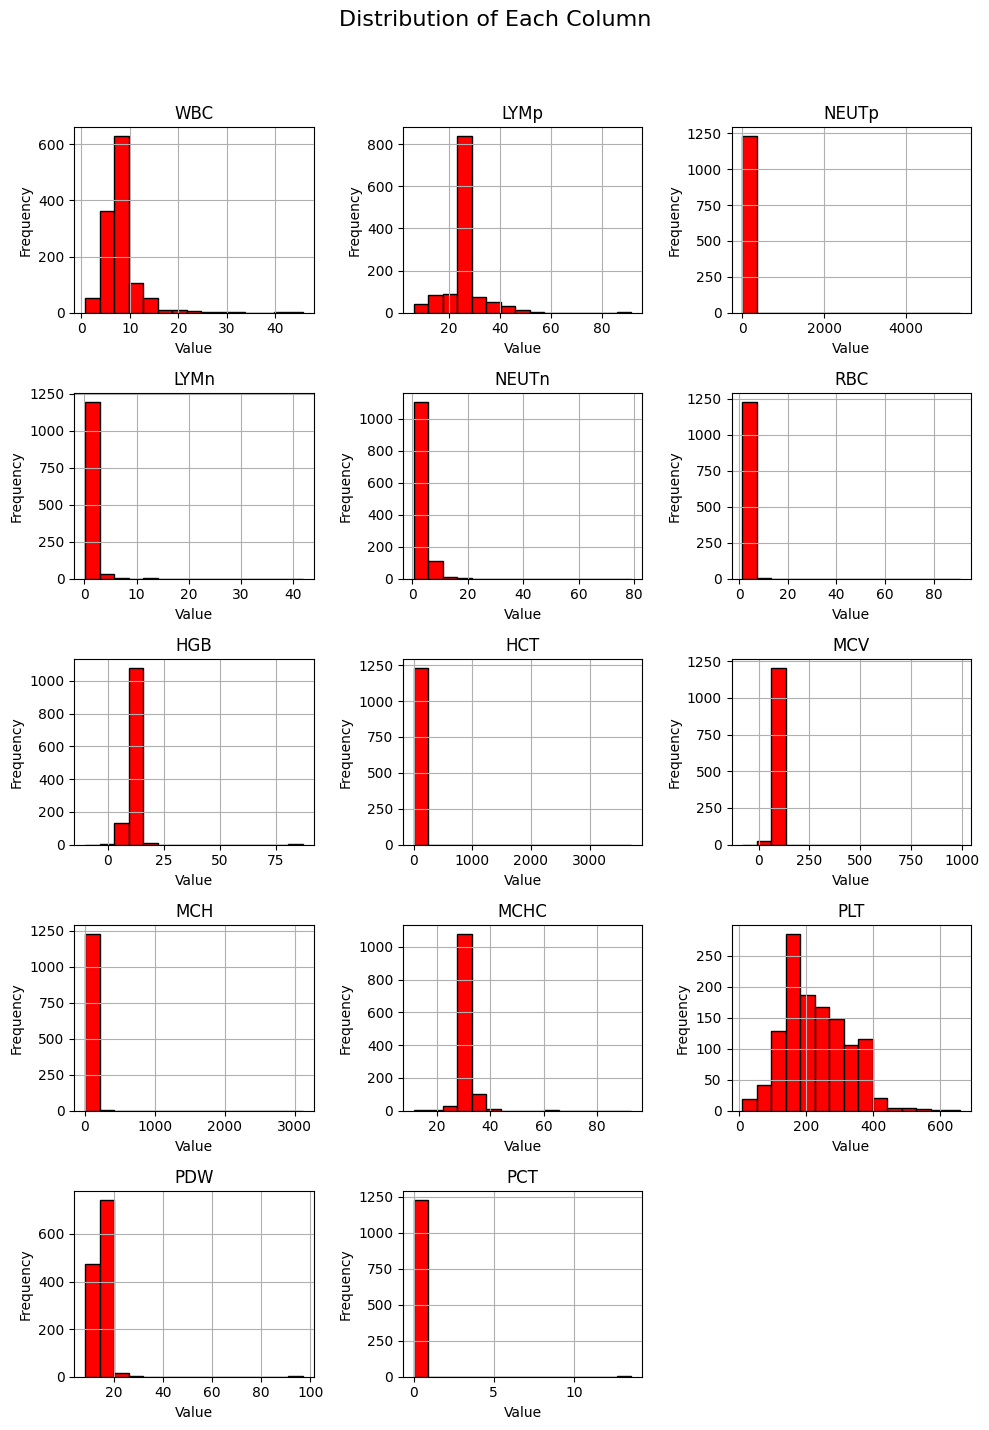

In [ ]:
# feature distribution

# numeric column
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# size and grid
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(10, 15))
fig.suptitle('Distribution of Each Column', fontsize=16)
axes = axes.flatten()  # Mengubah grid menjadi array untuk iterasi

# histogram for each feature
for i, col in enumerate(numeric_columns):
    df[col].hist(ax=axes[i], bins=15, color='r', edgecolor='black')
    axes[i].set_title(col)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

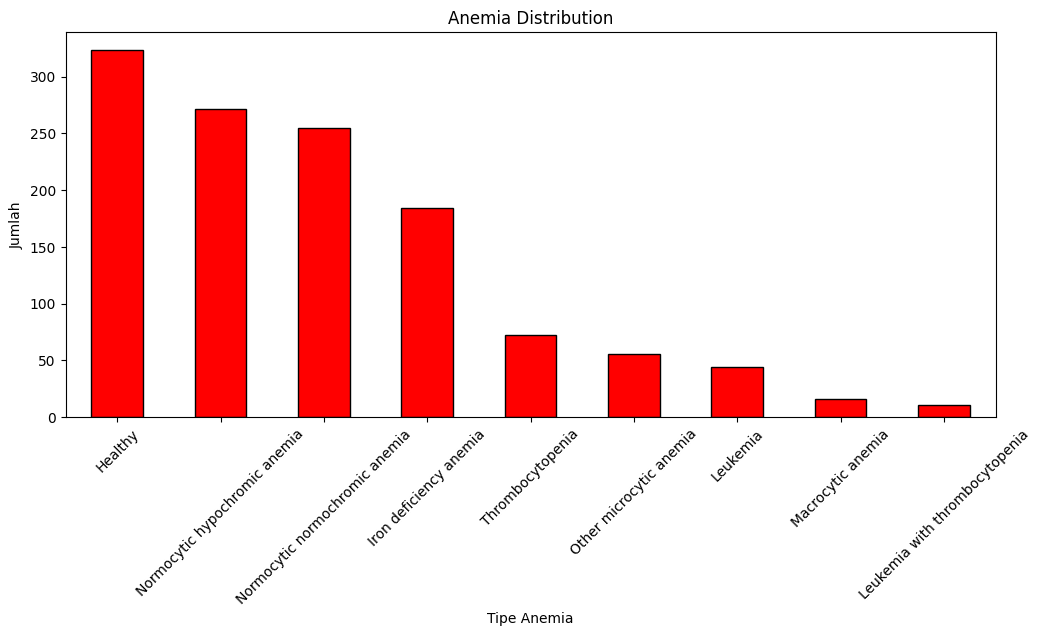

In [ ]:
# label distribution
anemia_counts = df['Diagnosis'].value_counts()

# plot bar char
plt.figure(figsize=(12, 5))
anemia_counts.plot(kind='bar', color='r', edgecolor='black')
plt.title('Anemia Distribution')
plt.xlabel('Tipe Anemia')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.show()

## Data Preprocessing

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

X = df.drop('Diagnosis', axis=1)  # feature
y = df['Diagnosis']  # label

# split data 80:10:10
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# data normalization
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_val_scaled = sc.transform(X_val)
X_test_scaled = sc.transform(X_test)

# konversi label string
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

# konversi ke dataset tensorflow
train_dataset = tf.data.Dataset.from_tensor_slices((X_train_scaled, y_train_encoded))
val_dataset = tf.data.Dataset.from_tensor_slices((X_val_scaled, y_val_encoded))
test_dataset = tf.data.Dataset.from_tensor_slices((X_test_scaled, y_test_encoded))

# mengatur shuffle dan batch size
train_dataset = train_dataset.shuffle(buffer_size=1000).batch(32)
val_dataset = val_dataset.batch(32)
test_dataset = test_dataset.batch(32)

train_dataset, val_dataset, test_dataset

(<_BatchDataset element_spec=(TensorSpec(shape=(None, 14), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>,
 <_BatchDataset element_spec=(TensorSpec(shape=(None, 14), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>,
 <_BatchDataset element_spec=(TensorSpec(shape=(None, 14), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>)

## Input Output

In [ ]:
# check input shape

print("data shape X_train_scaled:", X_train_scaled[0].shape)
print()

print("input (X_train_scaled index 1):")
print(X_train_scaled[0])
print()

print("input data type:", type(X_train_scaled))

data shape X_train_scaled: (14,)

input (X_train_scaled index 1):
[-0.21487692  0.01240161 -0.00837429 -0.00824559 -0.01062728  0.09263872
  0.32562223  0.31377334 -0.03701817 -0.07398302  0.05046797 -0.86128435
 -0.00256609 -0.01572327]

input data type: <class 'numpy.ndarray'>


In [ ]:
# label index

output_df = pd.DataFrame({
    "Original Label": label_encoder.classes_,
    "Encoded Value / Index Output": range(len(label_encoder.classes_))
})

def left_align(s):
    return ['text-align: left' for _ in s]

output2_df = output_df.style.apply(left_align, axis=1).set_table_styles(
    [{'selector': 'th', 'props': [('text-align', 'left')]}]
)

output2_df

,Original Label,Encoded Value / Index Output
0,Healthy,0
1,Iron deficiency anemia,1
2,Leukemia,2
3,Leukemia with thrombocytopenia,3
4,Macrocytic anemia,4
5,Normocytic hypochromic anemia,5
6,Normocytic normochromic anemia,6
7,Other microcytic anemia,7
8,Thrombocytopenia,8


## Model

### Function

In [ ]:
def plot_training_history(history, model_name="Model"):

    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(acc))

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'r', label='Training accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
    plt.title(f'{model_name}: Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(loc='best')

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'r', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title(f'{model_name}: Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(loc='best')

    plt.show()

### Model 1

In [ ]:
model_1 = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.2),
    Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.2),
    Dense(len(label_encoder.classes_), activation='softmax')
])

model_1.compile(optimizer=SGD(learning_rate=0.001, momentum=0.9),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

print("Input shape of the model:", model_1.input_shape)
print("Output shape of the model:", model_1.output_shape)
print()

print(model_1.summary())

Input shape of the model: (None, 14)
Output shape of the model: (None, 9)



Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_48 (Dense)                     │ (None, 128)                 │           1,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_18               │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_36 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_49 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_37 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_50 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_38 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_51 (Dense)                     │ (None, 9)                   │             297 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,065 (51.04 KB)

 Trainable params: 12,809 (50.04 KB)

 Non-trainable params: 256 (1.00 KB)

None


In [ ]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

history_1 = model_1.fit(train_dataset,
                    epochs=100,
                    validation_data=val_dataset,
                    callbacks=[reduce_lr],
                    verbose=1
                    )

Epoch 1/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.1143 - loss: 2.7145 - val_accuracy: 0.3415 - val_loss: 2.1726 - learning_rate: 0.0010
Epoch 2/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3048 - loss: 2.1491 - val_accuracy: 0.3821 - val_loss: 2.0549 - learning_rate: 0.0010
Epoch 3/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4203 - loss: 1.8828 - val_accuracy: 0.4634 - val_loss: 1.9594 - learning_rate: 0.0010
Epoch 4/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4730 - loss: 1.7425 - val_accuracy: 0.4959 - val_loss: 1.8623 - learning_rate: 0.0010
Epoch 5/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4865 - loss: 1.6279 - val_accuracy: 0.5203 - val_loss: 1.7596 - learning_rate: 0.0010
Epoch 6/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5145 - loss: 1.6392 - val_accuracy: 0.5447 - val_loss: 1.6704 - learning_rate: 0.0010
Epoch 7/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5034 - loss: 1.5620 - val_acc

In [ ]:
model_1.evaluate(test_dataset)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6184 - loss: 1.0368


[1.0314162969589233, 0.6370967626571655]

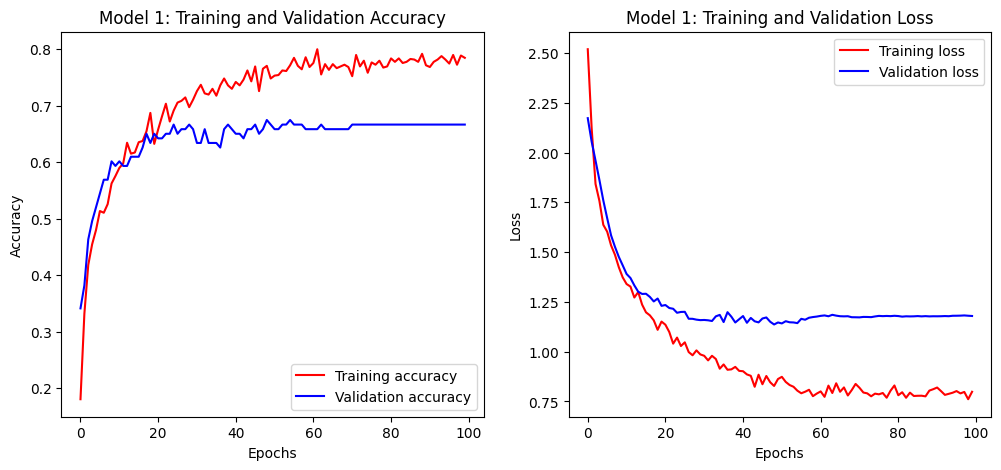

In [ ]:
plot_training_history(history_1, model_name="Model 1")

### Model 2

In [ ]:
model_2 = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),
    Dense(256, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.2),
    Dense(32, activation='relu',),
    Dropout(0.2),
    Dense(16, activation='relu',),
    Dense(len(label_encoder.classes_), activation='softmax')
])

model_2.compile(optimizer=Adam(learning_rate=0.001),
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

print("Input shape of the model:", model_2.input_shape)
print("Output shape of the model:", model_2.output_shape)
print()

print(model_2.summary())

Input shape of the model: (None, 14)
Output shape of the model: (None, 9)



Model: "sequential_62"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_269 (Dense)                    │ (None, 256)                 │           3,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_93               │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_181 (Dropout)                │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_270 (Dense)                    │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_182 (Dropout)                │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_271 (Dense)                    │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_183 (Dropout)                │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_272 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_184 (Dropout)                │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_273 (Dense)                    │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_274 (Dense)                    │ (None, 9)                   │             153 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 48,777 (190.54 KB)

 Trainable params: 48,265 (188.54 KB)

 Non-trainable params: 512 (2.00 KB)

None


In [ ]:
es = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history_2 = model_2.fit(train_dataset,
                      epochs=50,
                      validation_data=val_dataset,
                      # callbacks=es,
                      verbose=1
                    )

Epoch 1/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.2153 - loss: 2.1530 - val_accuracy: 0.4062 - val_loss: 2.1343
Epoch 2/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4725 - loss: 1.5368 - val_accuracy: 0.5000 - val_loss: 1.7583
Epoch 3/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5719 - loss: 1.3087 - val_accuracy: 0.6094 - val_loss: 1.4294
Epoch 4/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6222 - loss: 1.2262 - val_accuracy: 0.6406 - val_loss: 1.2585
Epoch 5/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6877 - loss: 1.0770 - val_accuracy: 0.7188 - val_loss: 1.0332
Epoch 6/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7219 - loss: 0.9524 - val_accuracy: 0.7109 - val_loss: 0.9896
Epoch 7/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7113 - loss: 0.9685 - val_accuracy: 0.7109 - val_loss: 0.9318
Epoch 8/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7349 - loss: 0.9326 - val_accuracy: 0.7969 - val_loss:

###Model 3

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf

# Misalkan df adalah DataFrame Anda
X = df.drop('Diagnosis', axis=1)  # features
y = df['Diagnosis']  # target label

# Split data 80:10:10
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Normalisasi data
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_val_scaled = sc.transform(X_val)
X_test_scaled = sc.transform(X_test)

# Konversi label string menjadi angka
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

# Terapkan SMOTE untuk menangani ketidakseimbangan kelas pada data training
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train_encoded)

# Verifikasi jumlah data setelah SMOTE
print(f'Jumlah data sebelum SMOTE: {len(y_train_encoded)}')
print(f'Jumlah data setelah SMOTE: {len(y_train_resampled)}')

# Convert data kembali ke TensorFlow dataset (jika diperlukan untuk model TensorFlow)
train_dataset = tf.data.Dataset.from_tensor_slices((X_train_resampled, y_train_resampled))
val_dataset = tf.data.Dataset.from_tensor_slices((X_val_scaled, y_val_encoded))
test_dataset = tf.data.Dataset.from_tensor_slices((X_test_scaled, y_test_encoded))

# Mengatur shuffle dan batch size
train_dataset = train_dataset.shuffle(buffer_size=1000).batch(32)
val_dataset = val_dataset.batch(32)
test_dataset = test_dataset.batch(32)

# Menampilkan dataset untuk verifikasi
train_dataset, val_dataset, test_dataset


Jumlah data sebelum SMOTE: 1024
Jumlah data setelah SMOTE: 2295


(<_BatchDataset element_spec=(TensorSpec(shape=(None, 14), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>,
 <_BatchDataset element_spec=(TensorSpec(shape=(None, 14), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>,
 <_BatchDataset element_spec=(TensorSpec(shape=(None, 14), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>)

In [ ]:
from tensorflow.keras import layers, models

# Membangun model
model = models.Sequential()

# Layer input
model.add(layers.InputLayer(input_shape=(X_train_scaled.shape[1],)))

# Hidden Layer 1
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))

# Hidden Layer 2
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))

# Hidden Layer 3
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dropout(0.5))

# Output Layer
model.add(layers.Dense(len(label_encoder.classes_), activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_63"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_275 (Dense)                    │ (None, 128)                 │           1,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_185 (Dropout)                │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_276 (Dense)                    │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_186 (Dropout)                │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_277 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_187 (Dropout)                │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_278 (Dense)                    │ (None, 9)                   │             297 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,553 (49.04 KB)

 Trainable params: 12,553 (49.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Melatih model
model.fit(X_train_resampled, y_train_resampled,
          epochs=100,
          batch_size=32,
          validation_data=(X_val_scaled, y_val_encoded),
          callbacks=[early_stopping])



Epoch 1/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.1397 - loss: 2.2559 - val_accuracy: 0.3594 - val_loss: 2.1019
Epoch 2/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2490 - loss: 2.0778 - val_accuracy: 0.4375 - val_loss: 1.9844
Epoch 3/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3311 - loss: 1.8995 - val_accuracy: 0.5469 - val_loss: 1.7789
Epoch 4/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4059 - loss: 1.7195 - val_accuracy: 0.6328 - val_loss: 1.6015
Epoch 5/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4563 - loss: 1.6248 - val_accuracy: 0.6719 - val_loss: 1.4633
Epoch 6/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5057 - loss: 1.4764 - val_accuracy: 0.7188 - val_loss: 1.3285
Epoch 7/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5183 - loss: 1.4205 - val_accuracy: 0.7031 - val_loss: 1.2378
Epoch 8/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5878 - loss: 1.3292 - val_accuracy: 0.7031 - v

In [ ]:
# Evaluasi model
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test_encoded)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7740 - loss: 0.6048  
Test Loss: 0.6055922508239746, Test Accuracy: 0.7984496355056763


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Prediksi pada data test
y_pred = model.predict(test_dataset)
y_pred_classes = np.argmax(y_pred, axis=1)  # Ambil kelas dengan probabilitas tertinggi

# Convert y_test_encoded ke bentuk array
y_test_true = np.concatenate([y for x, y in test_dataset], axis=0)

# Confusion Matrix
cm = confusion_matrix(y_test_true, y_pred_classes)
print('Confusion Matrix:')
print(cm)

# Classification Report
report = classification_report(y_test_true, y_pred_classes, target_names=label_encoder.classes_)
print('Classification Report:')
print(report)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Confusion Matrix:
[[39  2  0  0  0  0  2  0  1]
 [ 0 17  0  0  0  1  0  1  0]
 [ 1  0  3  0  0  0  0  0  0]
 [ 0  0  1  2  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0]
 [ 3  2  0  0  2 17  1  3  0]
 [ 0  0  0  1  1  3 14  0  0]
 [ 0  0  1  0  0  0  0  3  0]
 [ 0  0  0  0  0  0  0  0  8]]
Classification Report:
                                precision    recall  f1-score   support

                       Healthy       0.91      0.89      0.90        44
        Iron deficiency anemia       0.81      0.89      0.85        19
                      Leukemia       0.60      0.75      0.67         4
Leukemia with thrombocytopenia       0.67      0.67      0.67         3
             Macrocytic anemia       0.00      0.00      0.00         0
 Normocytic hypochromic anemia       0.81      0.61      0.69        28
Normocytic normochromic anemia       0.82      0.74      0.78        19
       Other microcytic anemia       0.43      0.75      0.55         4
 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Model Prediction

In [ ]:
# prediksi

input_list = [7.04013314, 26.40465422, 71.83098941, 1.81192925, 4.9590166, 4.66833758,
              5.70866842, 182.13405676, 84.93527652, 15.61875771,
              20.4905213, 140.31264139, 10.32501175, 0.21364748]

input_array = np.array(input_list)
input_array = input_array.reshape(1, -1) # mengubah bentuk nya ke array 2D

input_scaled = sc.transform(input_array) # normalisasi data menggunakan scaler
output_model = model.predict(input_scaled)

predicted_label = np.argmax(output_model, axis=1) # indeks tertinggi

print("Output Model:", output_model)
print("Predicted label:", predicted_label)
print(label_encoder.classes_[predicted_label])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
Output Model: [[4.1136625e-15 9.7794972e-02 2.8950200e-14 6.4374024e-22 4.9630185e-11
  9.0220505e-01 6.2077492e-13 5.0991535e-13 3.0154850e-12]]
Predicted label: [5]
['Normocytic hypochromic anemia']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
# Prediction on test dataset
predictions = model.predict(test_dataset)

# mengambil nilai probabilitas tertinggi
predicted_classes = tf.argmax(predictions, axis=1)

# Mengonversi label prediksi ke label asli
predicted_labels = label_encoder.inverse_transform(predicted_classes)

# Mengambil nilai aktual (label asli) dari test dataset
y_true = y_test_encoded

# Mengonversi nilai aktual ke label asli
actual_labels = label_encoder.inverse_transform(y_test_encoded)

# Membuat DataFrame untuk membandingkan nilai aktual dan prediksi
comparison_df = pd.DataFrame({
    'Actual': actual_labels,
    'Predicted': predicted_labels
})

random_sample_df = comparison_df.sample(10).reset_index(drop=True)

# Membuat fungsi untuk rata kiri tampilan
def left_align(s):
    return ['text-align: left' for _ in s]

# Mengatur tampilan DataFrame dengan rata kiri
style_df = random_sample_df.style.apply(left_align, axis=1).set_table_styles(
    [{'selector': 'th', 'props': [('text-align', 'left')]}]
)

# Menampilkan DataFrame dengan styler jika dalam notebook
style_df

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


,Actual,Predicted
0,Healthy,Healthy
1,Leukemia,Healthy
2,Iron deficiency anemia,Iron deficiency anemia
3,Iron deficiency anemia,Iron deficiency anemia
4,Normocytic normochromic anemia,Normocytic normochromic anemia
5,Normocytic hypochromic anemia,Healthy
6,Normocytic hypochromic anemia,Normocytic hypochromic anemia
7,Healthy,Healthy
8,Iron deficiency anemia,Other microcytic anemia
9,Iron deficiency anemia,Iron deficiency anemia


In [ ]:
def predict_anemia_from_features(features, model, class_name):
  # Reshape features to a 2D array with 1 sample and the correct number of features
  features = np.array(features).reshape(1, -1)

  # Check if the number of features in 'features' matches the expected number
  # by the StandardScaler (sc)
  if features.shape[1] != sc.n_features_in_:
    raise ValueError(f"Input features have {features.shape[1]} features, "
                     f"but StandardScaler expects {sc.n_features_in_} features.")

  features_scaled = sc.transform(features)

  # Assuming 'model' is a Keras model:
  predictions = model.predict(features_scaled)
  predicted_class_index = np.argmax(predictions)
  confidence = np.max(predictions)

  # Map predicted class index to class name if provided
  predicted_class = class_name[predicted_class_index] if class_name else predicted_class_index

  return predicted_class, confidence

In [ ]:
input_features = [7.04013314, 26.40465422, 71.83098941, 1.81192925, 4.9590166, 4.66833758,
              5.70866842, 182.13405676, 84.93527652, 15.61875771,
              20.4905213, 140.31264139, 10.32501175, 0.21364748]

class_names = ["Healthy", "Iron Deficiency Anemia", "Leukemia",
               "Leukemia with Thrombocytopenia", "Macrocytic Anemia",
               "Normocytic Hypochromic Anemia", "Normocytic Normochromic Anemia",
               "Other Microcytic Anemia", "Thrombocytopenia"]

predicted_class, confidence = predict_anemia_from_features(input_features, model, class_names)

print(f"Predicted Class: {predicted_class}")
print(f"Confidence: {confidence:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted Class: Normocytic Hypochromic Anemia
Confidence: 0.90


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
print(predicted_classes[10])

## Save Model

In [ ]:
model_path = '/content/drive/My Drive/Bangkit/model.h5'
model.save(model_path)

NameError: name 'model' is not defined

## GitHub

In [ ]:
# !rm -rf /content/AnemiCare

In [ ]:
%cd /content/AnemiCare

/content/AnemiCare


In [ ]:
!git branch

* ML


In [ ]:
from google.colab import drive

drive.mount('/content/drive')
file = '/content/drive/MyDrive/Bangkit/Capstone_Anemia_Prediction.ipynb'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!cp /content/drive/MyDrive/Bangkit/Capstone_Anemia_Prediction.ipynb /content/AnemiCare/

In [ ]:
!ls /content/AnemiCare

AnemiCare  Capstone_Anemia_Prediction.ipynb  README.md


In [ ]:
!git config --global user.name "Ramadhan_Kiki_Arina"
!git config --global user.email "ramadhanpmuhammad@gmail.com"

!git add Capstone_Anemia_Prediction.ipynb
!git commit -m "first commit by ML team"
!git push origin ML

[ML 029d6a0] first commit by ML team
 1 file changed, 1 insertion(+), 1 deletion(-)
Enumerating objects: 10, done.
Counting objects: 100% (10/10), done.
Delta compression using up to 2 threads
Compressing objects: 100% (9/9), done.
Writing objects: 100% (9/9), 244.56 KiB | 6.11 MiB/s, done.
Total 9 (delta 2), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (2/2), done.
remote: error: GH013: Repository rule violations found for refs/heads/ML.
remote: 
remote: - GITHUB PUSH PROTECTION
remote:   —————————————————————————————————————————
remote:     Resolve the following violations before pushing again
remote: 
remote:     - Push cannot contain secrets
remote: 
remote:     
remote:      (?) Learn how to resolve a blocked push
remote:      https://docs.github.com/code-security/secret-scanning/working-with-secret-scanning-and-push-protection/working-with-push-protection-from-the-command-line#resolving-a-blocked-push
remote:     
remote:     
remote:       —— GitHub Personal 

In [ ]:
notebook_name = "Capstone_Anemia_Prediction.ipynb"
!cp "{notebook_name}" /content/myrepo/